In [ ]:
from sklearn import metrics
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.tree import export_text

# For Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [ ]:
pip install statsmodels


In [ ]:
import statsmodels.api as sm

In [ ]:
data = pd.read_csv('Encoded_Integrated_Data.csv')
data

,Unnamed: 0,Country,Year,ISO_CODE,yearly_average_temperature,yearly_average_temperature_uncertainty,Methane,Nitrous_oxide,Total_ghg,Total_ghg_excl_lucf,Trade_co2,Total_Co2,Consumption_co2,Population,GDP,Primary_Energy_Consumption,Latitude,Longitude,Commodity_ID,Commodity_Description,Area_Harvested_HA,Beginning_Stocks_MT,Ending_Stocks_MT,Imports_MT,Exports_MT,Feed_Dom_Consumption_MT,FSI_Consumption_MT,Production_MT,TY_Imports_MT,TY_Imports_from_US_MT,TY_Exports_MT,Milling_Rate_MT,Rough_Production_MT,Barley,Corn,Empty,Millet,Mixed Grain,Oats,"Rice, Milled",Rye,Sorghum,Wheat
0,0,Afghanistan,1960,AFG,13.985417,0.441833,18.76,6.94,43.61,26.26,4.825,7.233,52.630,8996967,13033254000,2.950,33.939110,67.709953,410000,Wheat,2230000,0,0,51000,0,0,2330000,2279000,51000,46000,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,Afghanistan,1960,AFG,13.985417,0.441833,18.76,6.94,43.61,26.26,4.825,7.233,52.630,8996967,13033254000,2.950,33.939110,67.709953,422110,"Rice, Milled",207000,0,0,0,0,0,0,203000,0,0,0,6500000,313000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,Afghanistan,1960,AFG,13.985417,0.441833,18.76,6.94,43.61,26.26,4.825,7.233,52.630,8996967,13033254000,2.950,33.939110,67.709953,430000,Barley,350000,0,0,0,0,0,378000,378000,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Afghanistan,1960,AFG,13.985417,0.441833,18.76,6.94,43.61,26.26,4.825,7.233,52.630,8996967,13033254000,2.950,33.939110,67.709953,440000,Corn,500000,0,0,0,0,0,700000,700000,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Afghanistan,1961,AFG,14.064917,0.398083,19.04,7.05,44.00,26.65,2.799,8.663,33.225,9169406,13146287000,3.018,33.939110,67.709953,410000,Wheat,2230000,0,0,15000,0,0,2294000,2279000,15000,15000,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27488,27488,Zimbabwe,2012,ZWE,21.521333,0.538500,11.85,6.65,42.36,30.78,2.895,16.123,10.778,13115149,20909967517,55.756,-19.015438,29.154857,410000,Wheat,10000,52000,36000,250000,0,0,300000,34000,250000,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27489,27489,Zimbabwe,2012,ZWE,21.521333,0.538500,11.85,6.65,42.36,30.78,2.895,16.123,10.778,13115149,20909967517,55.756,-19.015438,29.154857,430000,Barley,9000,4000,4000,15000,0,5000,61000,51000,15000,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27490,27490,Zimbabwe,2012,ZWE,21.521333,0.538500,11.85,6.65,42.36,30.78,2.895,16.123,10.778,13115149,20909967517,55.756,-19.015438,29.154857,440000,Corn,1281000,25000,15000,600000,0,80000,1529000,999000,700000,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27491,27491,Zimbabwe,2012,ZWE,21.521333,0.538500,11.85,6.65,42.36,30.78,2.895,16.123,10.778,13115149,20909967517,55.756,-19.015438,29.154857,459100,Millet,203000,0,0,0,0,0,44000,44000,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
encoded_cols = ['Barley', 'Corn', 'Empty', 'Millet', 'Mixed Grain', 'Oats', 'Rice, Milled', 'Rye', 'Sorghum', 'Wheat']

In [ ]:
data_to_normalize = data.drop(encoded_cols, axis = 1)
data = data.drop('Unnamed: 0', axis = 1)

In [ ]:
non_scaled_columns = ['Country','Year', 'ISO_CODE','Longitude','Latitude','Commodity_ID','Commodity_Description']
instances = data[non_scaled_columns]
instances

,Country,Year,ISO_CODE,Longitude,Latitude,Commodity_ID,Commodity_Description
0,Afghanistan,1960,AFG,67.709953,33.939110,410000,Wheat
1,Afghanistan,1960,AFG,67.709953,33.939110,422110,"Rice, Milled"
2,Afghanistan,1960,AFG,67.709953,33.939110,430000,Barley
3,Afghanistan,1960,AFG,67.709953,33.939110,440000,Corn
4,Afghanistan,1961,AFG,67.709953,33.939110,410000,Wheat
...,...,...,...,...,...,...,...
27488,Zimbabwe,2012,ZWE,29.154857,-19.015438,410000,Wheat
27489,Zimbabwe,2012,ZWE,29.154857,-19.015438,430000,Barley
27490,Zimbabwe,2012,ZWE,29.154857,-19.015438,440000,Corn
27491,Zimbabwe,2012,ZWE,29.154857,-19.015438,459100,Millet


In [ ]:
data_to_normalize = data.drop(non_scaled_columns, axis=1)
scaled_columns = data_to_normalize.columns

In [ ]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data_to_normalize)
scaled_data = pd.DataFrame(normalized_data, columns = scaled_columns)
print(scaled_data.shape)

(27493, 35)


In [ ]:
data[scaled_columns] = scaled_data[scaled_columns]

# Apply Final DBSCAN to Encoded Integrated Data


In [ ]:
dbscan2 = DBSCAN(eps=0.95, min_samples=15).fit(scaled_data)

In [ ]:
scaled_data_labeled = scaled_data.copy()
data_unscaled = data.copy()

In [ ]:
scaled_data_labeled['Labels'] = dbscan2.labels_
data_to_normalize['Labels'] = dbscan2.labels_
data['Labels'] = dbscan2.labels_
data_unscaled['Labels'] = dbscan2.labels_

In [ ]:
scaled_data_labeled = scaled_data_labeled[scaled_data_labeled['Labels'] != -1]
data_to_normalize = data_to_normalize[data_to_normalize['Labels'] != -1]
data = data[data['Labels'] != -1]

In [ ]:
cluster_labels_scaled = [str(x) for x in scaled_data_labeled['Labels'].unique()]
cluster_labels_unscaled = [str(x) for x in data_to_normalize['Labels'].unique()]

In [ ]:
c0 = scaled_data_labeled[scaled_data_labeled['Labels'] == 0]
c1 = scaled_data_labeled[scaled_data_labeled['Labels'] == 1]
c2 = scaled_data_labeled[scaled_data_labeled['Labels'] == 2]
c3 = scaled_data_labeled[scaled_data_labeled['Labels'] == 3]
c4 = scaled_data_labeled[scaled_data_labeled['Labels'] == 4]
c5 = scaled_data_labeled[scaled_data_labeled['Labels'] == 5]
c6 = scaled_data_labeled[scaled_data_labeled['Labels'] == 6]
c7 = scaled_data_labeled[scaled_data_labeled['Labels'] == 7]
c8 = scaled_data_labeled[scaled_data_labeled['Labels'] == 8]
c9 = scaled_data_labeled[scaled_data_labeled['Labels'] == 9]
c10 = scaled_data_labeled[scaled_data_labeled['Labels'] == 10]
c11 = scaled_data_labeled[scaled_data_labeled['Labels'] == 11]
c12 = scaled_data_labeled[scaled_data_labeled['Labels'] == 12]
c13 = scaled_data_labeled[scaled_data_labeled['Labels'] == 13]
c14 = scaled_data_labeled[scaled_data_labeled['Labels'] == 14]
c15 = scaled_data_labeled[scaled_data_labeled['Labels'] == 15]

c0u = data_to_normalize[data_to_normalize['Labels'] == 0]
c1u = data_to_normalize[data_to_normalize['Labels'] == 1]
c2u = data_to_normalize[data_to_normalize['Labels'] == 2]
c3u = data_to_normalize[data_to_normalize['Labels'] == 3]
c4u = data_to_normalize[data_to_normalize['Labels'] == 4]
c5u = data_to_normalize[data_to_normalize['Labels'] == 5]
c6u = data_to_normalize[data_to_normalize['Labels'] == 6]
c7u = data_to_normalize[data_to_normalize['Labels'] == 7]
c8u = data_to_normalize[data_to_normalize['Labels'] == 8]
c9u = data_to_normalize[data_to_normalize['Labels'] == 9]
c10u = data_to_normalize[data_to_normalize['Labels'] == 10]
c11u = data_to_normalize[data_to_normalize['Labels'] == 11]
c12u = data_to_normalize[data_to_normalize['Labels'] == 12]
c13u = data_to_normalize[data_to_normalize['Labels'] == 13]
c14u = data_to_normalize[data_to_normalize['Labels'] == 14]
c15u = data_to_normalize[data_to_normalize['Labels'] == 15]

c0un = data[data['Labels'] == 0]
c1un = data[data['Labels'] == 1]
c2un = data[data['Labels'] == 2]
c3un = data[data['Labels'] == 3]
c4un = data[data['Labels'] == 4]
c5un = data[data['Labels'] == 5]
c6un = data[data['Labels'] == 6]
c7un = data[data['Labels'] == 7]
c8un = data[data['Labels'] == 8]
c9un = data[data['Labels'] == 9]
c10un = data[data['Labels'] == 10]
c11un = data[data['Labels'] == 11]
c12un = data[data['Labels'] == 12]
c13un = data[data['Labels'] == 13]
c14un = data[data['Labels'] == 14]
c15un = data[data['Labels'] == 15]

c0uns = data_unscaled[data_unscaled['Labels'] == 0]
c1uns = data_unscaled[data_unscaled['Labels'] == 1]
c2uns = data_unscaled[data_unscaled['Labels'] == 2]
c3uns = data_unscaled[data_unscaled['Labels'] == 3]
c4uns = data_unscaled[data_unscaled['Labels'] == 4]
c5uns = data_unscaled[data_unscaled['Labels'] == 5]
c6uns = data_unscaled[data_unscaled['Labels'] == 6]
c7uns= data_unscaled[data_unscaled['Labels'] == 7]
c8uns = data_unscaled[data_unscaled['Labels'] == 8]
c9uns = data_unscaled[data_unscaled['Labels'] == 9]
c10uns = data_unscaled[data_unscaled['Labels'] == 10]
c11uns = data_unscaled[data_unscaled['Labels'] == 11]
c12uns = data_unscaled[data_unscaled['Labels'] == 12]
c13uns = data_unscaled[data_unscaled['Labels'] == 13]
c14uns = data_unscaled[data_unscaled['Labels'] == 14]
c15uns = data_unscaled[data_unscaled['Labels'] == 15]

# Decision Tree Visualization

In [ ]:
import graphviz
import random
from sklearn import metrics

In [ ]:
def plot_default_decision_tree(Dataframe):

    X = Dataframe.drop('Labels', axis = 1);
    y = Dataframe['Labels'];

    # 70% training and 30% test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    
    # Fitting a default DecisionTreeClassifier to our X_train and y_train data
    default_decision_tree_randstate0 = DecisionTreeClassifier(random_state=0).fit(X=X_train, y=y_train)
    
    # Checking the predicted labels given the X_test data
    default_randstate0_predictions = default_decision_tree_randstate0.predict(X=X_test)

    print("Accuracy:",metrics.accuracy_score(y_test, default_randstate0_predictions))
    
    dot_data = tree.export_graphviz(default_decision_tree_randstate0, out_file=None, 
                                feature_names=X.columns, class_names = cluster_labels_scaled, 
                                filled=True)

    return graphviz.Source(dot_data, format="png") 

In [ ]:
def plot_default_regression_tree(Dataframe, target):

    X = Dataframe.drop(['Labels', target], axis = 1);
    y = Dataframe[target];

    # 70% training and 30% test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # Fitting a default DecisionTreeClassifier to our X_train and y_train data
    default_regression_tree_randstate0 = DecisionTreeRegressor(random_state=0, max_depth = 5).fit(X=X_train, y=y_train)
    
    # Checking the predicted labels given the X_test data
    default_randstate0_predictions_reg = default_regression_tree_randstate0.predict(X=X_test)
    
    dot_data = tree.export_graphviz(default_regression_tree_randstate0, out_file=None, 
                                feature_names=X.columns,  
                                filled=True)

    return graphviz.Source(dot_data, format="png") 

In [ ]:
def plot_random_forest_regressor(Dataframe, target):

    X = Dataframe.drop(['Labels', target], axis = 1);
    y = Dataframe[target];

    # 70% training and 30% test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # Fitting a default DecisionTreeClassifier to our X_train and y_train data
    default_regression_tree_randstate0 = RandomForestRegressor(n_estimators = 500, random_state=0, max_depth = 5).fit(X=X_train, y=y_train)
    
    # Checking the predicted labels given the X_test data
    default_randstate0_predictions_reg = default_regression_tree_randstate0.predict(X=X_test)

    estimator = default_regression_tree_randstate0.estimators_[random.choice(range(1, 501))]

    rs = default_regression_tree_randstate0.score(X_test, y_test)
    adjr2 = 1 - (1-rs)*(len(y)-1)/(len(y)-X.shape[1]-1)
    mse = mean_squared_error(y_test, default_randstate0_predictions_reg)
    rsme = mse**.5
    print(mse)
    print(rsme)
    print(rs)
    print(adjr2)
    

    dot_data = tree.export_graphviz(estimator, out_file=None, 
                                feature_names=X.columns,  
                                filled=True)

    return graphviz.Source(dot_data, format="png") 

Accuracy: 0.9996360989810772


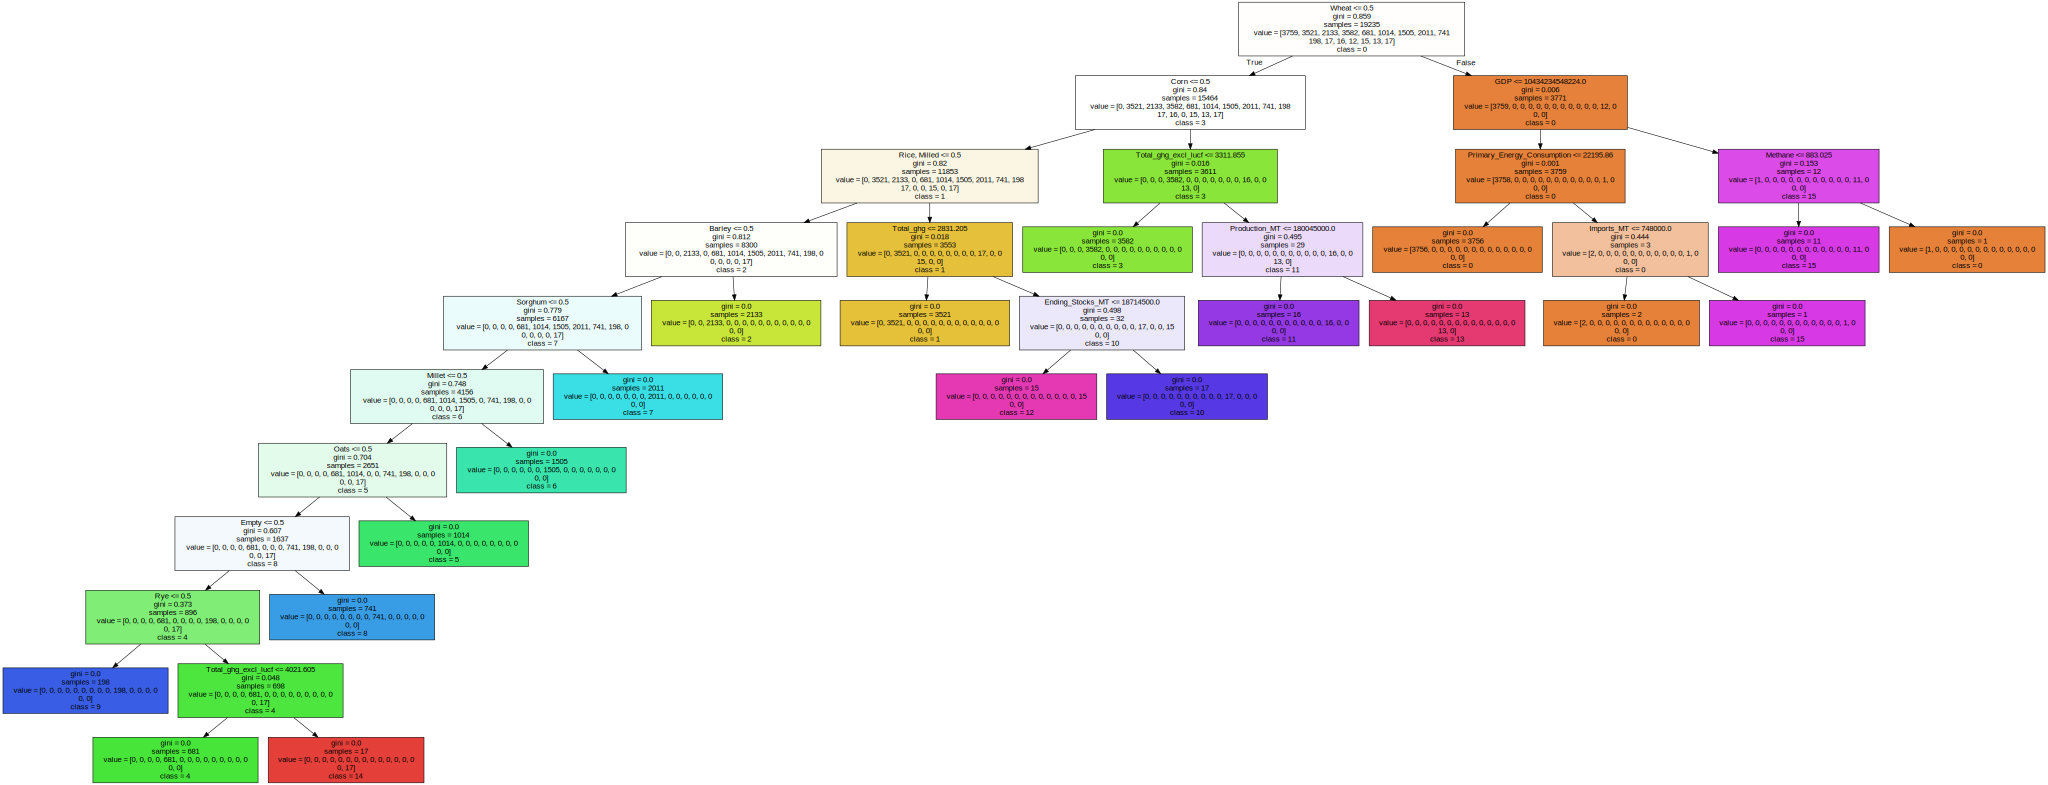

In [ ]:
plot_default_decision_tree(data_to_normalize)

Accuracy: 0.9996360989810772


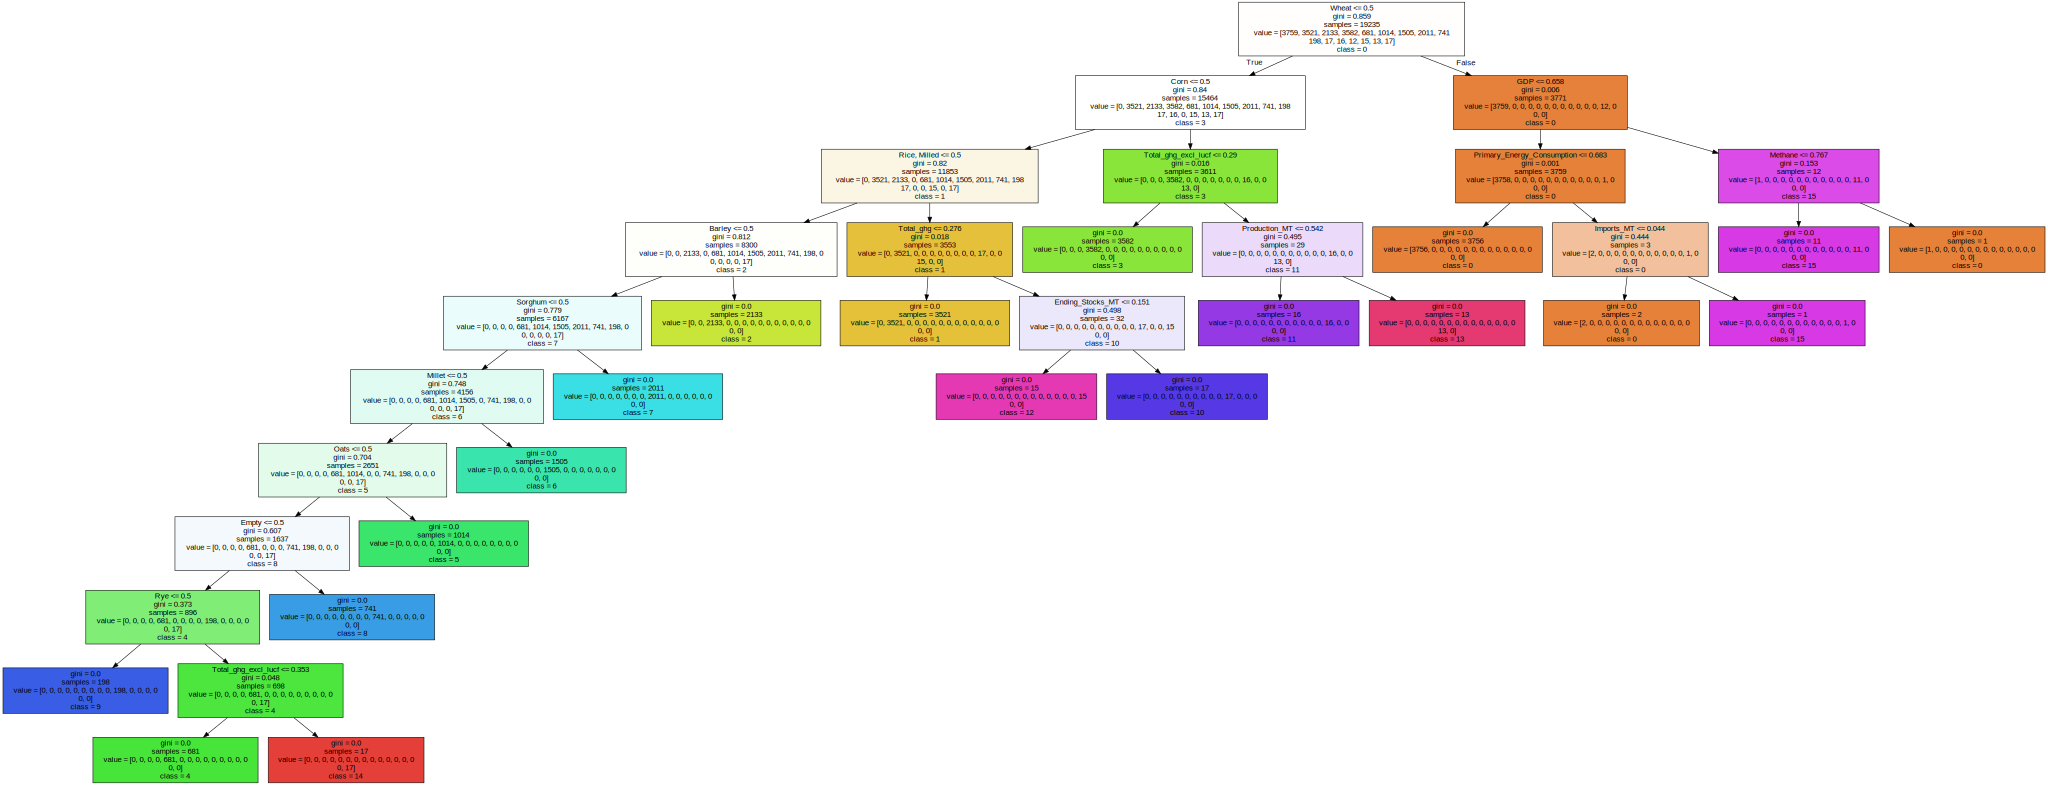

In [ ]:
plot_default_decision_tree(scaled_data_labeled)

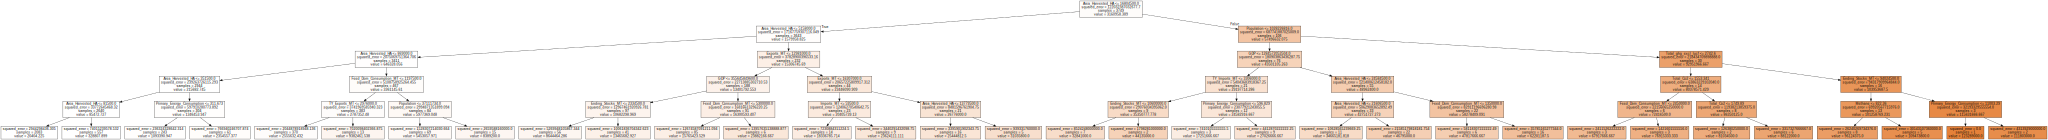

In [ ]:
plot_default_regression_tree(c0u , 'Production_MT')

1186401398955.7822
1089220.5465174546
0.9883535230334423
0.9882791186334304


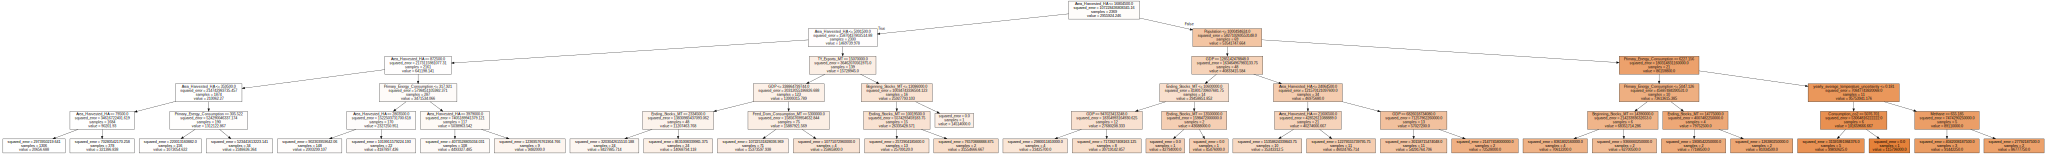

In [ ]:
plot_random_forest_regressor(c0u , 'Production_MT')

158075628202.90875
397587.25860232086
0.9991967367988163
0.9991913201092406


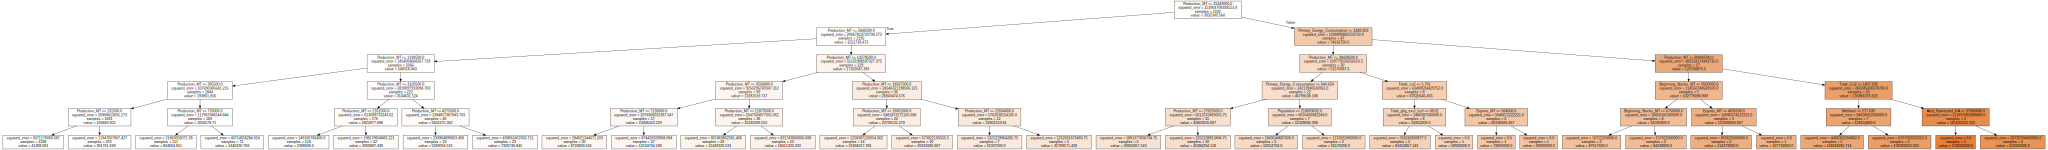

In [ ]:
plot_random_forest_regressor(c1u , 'Rough_Production_MT')

292225647935.2707
540578.9932426811
0.9628866665407767
0.962458629452034


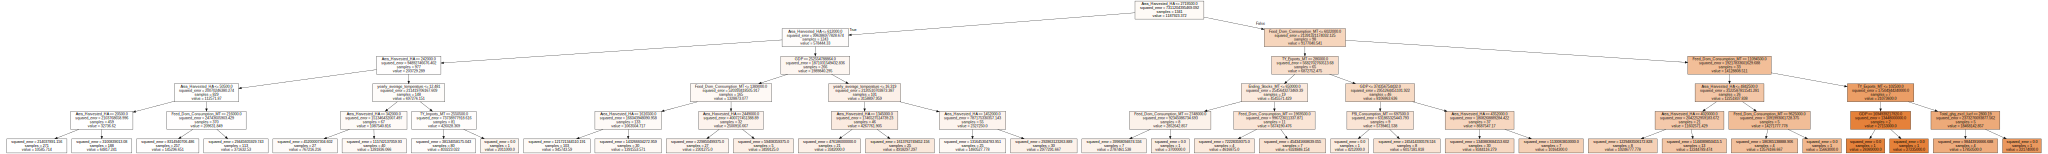

In [ ]:
plot_random_forest_regressor(c2u , 'Production_MT')

2495607579196.1426
1579749.2140197894
0.982215072268901
0.9820952134893456


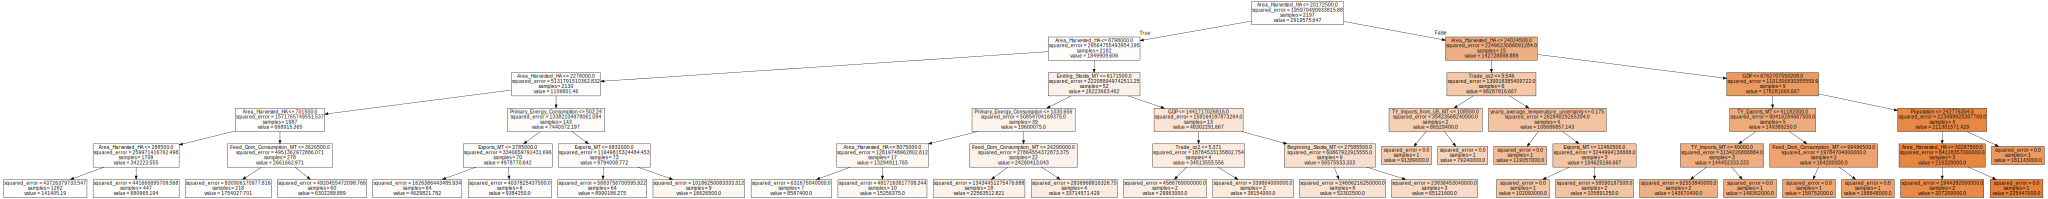

In [ ]:
plot_random_forest_regressor(c3u , 'Production_MT')

# Regression Analysis

In [ ]:
pd.set_option('float_format', '{:f}'.format)

In [ ]:
perc = [.1, .2, .3, .4, .5, .6, .7, .8, .9, .91, .92, .93, .94, .95, .96, .97, .98, .99 ,.993, .996, .999]

In [ ]:
corr_data = scaled_data.drop(encoded_cols, axis = 1)

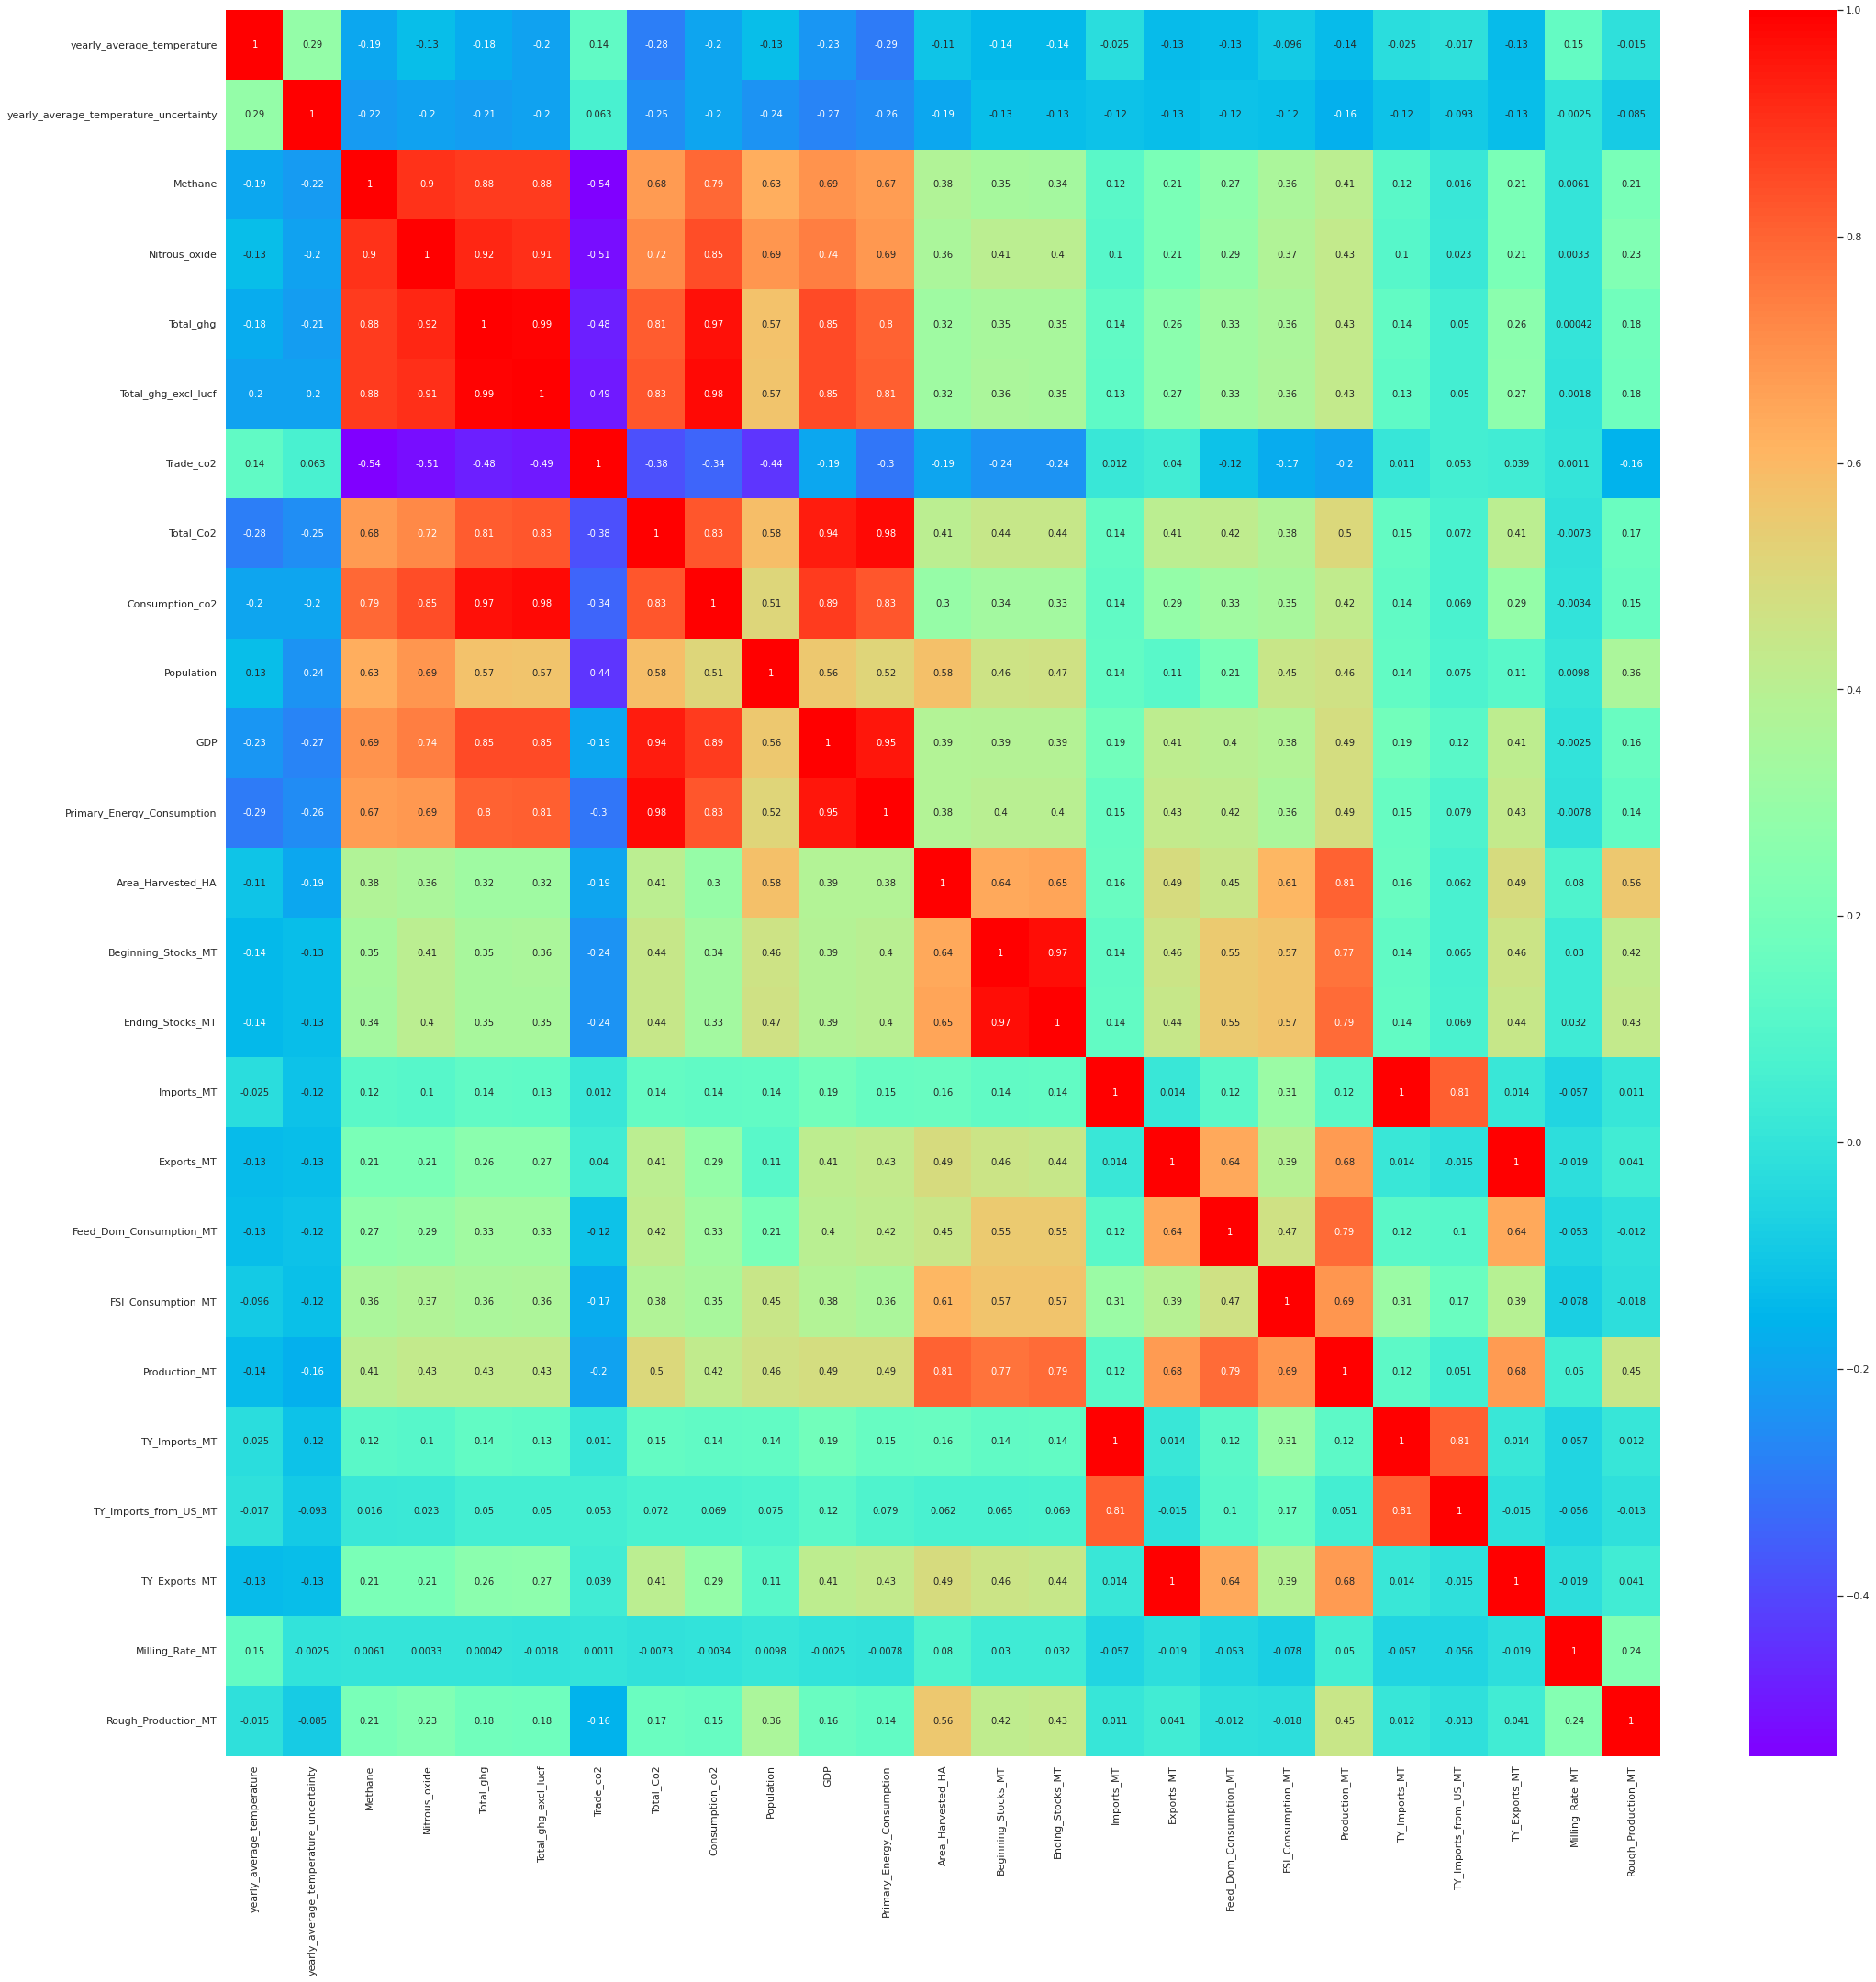

In [ ]:
plt.figure(figsize = (35,35))
sns.heatmap(corr_data.corr(), annot = True, cmap = 'rainbow')

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
test = data.iloc[:,17]

In [ ]:
def regression_2d(DataFrame, v1, v2):
  
  X = np.array(DataFrame[v1]).reshape(-1, 1)
  y = np.array(DataFrame[v2]).reshape(-1, 1)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
 
  regressor = LinearRegression()
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)

  plt.figure(figsize=(5,5))
  plt.scatter(X_train, y_train, color = 'red')
  plt.plot(X_train, regressor.predict(X_train), color = 'blue')
  plt.title('Training Set')
  plt.xlabel(v1)
  plt.ylabel(v2)
  plt.show()

  plt.figure(figsize=(5,5))
  plt.scatter(X_test, y_test, color = 'red')
  plt.plot(X_train, regressor.predict(X_train), color = 'blue')
  plt.title('Test Set')
  plt.xlabel(v1)
  plt.ylabel(v2)
  plt.show()
   
  print(metrics.r2_score(y_test, y_pred))
  mse = mean_squared_error(y_test, y_pred)
  rsme = mse**.5

  print(mse)
  print(rsme)

In [ ]:
def ols_reg(DataFrame, v1, v2):
   x = np.array(DataFrame[v1]).reshape(-1, 1)
   y = np.array(DataFrame[v2]).reshape(-1, 1)
   x = sm.add_constant(x)
   result = sm.OLS(y, x).fit()
   print(result.summary())

In [ ]:
def kfold_reg(DataFrame, v1, v2):

  X = np.array(DataFrame[v1]).reshape(-1, 1)
  y = np.array(DataFrame[v2]).reshape(-1, 1)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

  kfolds = KFold(n_splits = 10, shuffle = True, random_state=None)
  regressor = LinearRegression()
  scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=kfolds)
  print(scores)

In [ ]:
def mul_regression(DataFrame, v2, num_features):

    X = DataFrame.drop([v2, 'Labels', 'Barley', 'Corn', 'Empty', 'Millet', 'Mixed Grain', 'Oats', 'Rice, Milled', 'Rye', 'Sorghum', 'Wheat'] , axis = 1)
    y = np.array(DataFrame[v2]).reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    regressor = LinearRegression()
    selector = RFE(regressor, n_features_to_select=num_features, step=1)
    selector = selector.fit(X_train, y_train) 
    

    y_pred = selector.predict(X_test)
    r2 = metrics.r2_score(y_test, y_pred)
    adjr2 = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
    mse = mean_squared_error(y_test, y_pred)
    rsme = mse**.5
    print(mse)
    print(rsme)
    print(adjr2)
    return (list(zip(X_train.columns,selector.support_,selector.ranking_)))


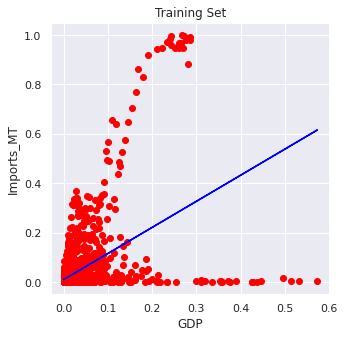

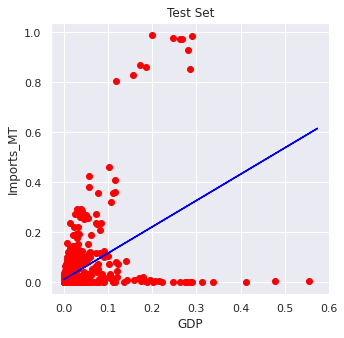

0.21865550054743188
0.006150882387694695
0.07842756140346768


In [ ]:
regression_2d(c3un, 'GDP', 'Imports_MT')

In [ ]:
mul_regression(c3, 'Production_MT', 2)

7.828095768116712e-05
0.00884765266503874
0.9382469443117158


[('yearly_average_temperature', False, 18),
 ('yearly_average_temperature_uncertainty', False, 17),
 ('Methane', False, 15),
 ('Nitrous_oxide', False, 20),
 ('Total_ghg', False, 6),
 ('Total_ghg_excl_lucf', False, 7),
 ('Trade_co2', False, 11),
 ('Total_Co2', False, 12),
 ('Consumption_co2', False, 8),
 ('Population', False, 19),
 ('GDP', False, 9),
 ('Primary_Energy_Consumption', False, 16),
 ('Area_Harvested_HA', False, 13),
 ('Beginning_Stocks_MT', False, 3),
 ('Ending_Stocks_MT', False, 2),
 ('Imports_MT', False, 5),
 ('Exports_MT', False, 4),
 ('Feed_Dom_Consumption_MT', True, 1),
 ('FSI_Consumption_MT', True, 1),
 ('TY_Imports_MT', False, 14),
 ('TY_Imports_from_US_MT', False, 21),
 ('TY_Exports_MT', False, 10),
 ('Milling_Rate_MT', False, 22),
 ('Rough_Production_MT', False, 23)]

In [ ]:
mul_regression(c1, 'Rough_Production_MT', 2)

4.41550990810704e-06
0.0021013114733677727
0.9990383819953927


[('yearly_average_temperature', False, 19),
 ('yearly_average_temperature_uncertainty', False, 21),
 ('Methane', False, 11),
 ('Nitrous_oxide', False, 5),
 ('Total_ghg', False, 10),
 ('Total_ghg_excl_lucf', False, 16),
 ('Trade_co2', False, 12),
 ('Total_Co2', False, 18),
 ('Consumption_co2', False, 13),
 ('Population', False, 6),
 ('GDP', False, 14),
 ('Primary_Energy_Consumption', False, 15),
 ('Area_Harvested_HA', False, 7),
 ('Beginning_Stocks_MT', False, 4),
 ('Ending_Stocks_MT', False, 3),
 ('Imports_MT', False, 9),
 ('Exports_MT', False, 2),
 ('Feed_Dom_Consumption_MT', False, 22),
 ('FSI_Consumption_MT', False, 23),
 ('Production_MT', True, 1),
 ('TY_Imports_MT', False, 17),
 ('TY_Imports_from_US_MT', False, 8),
 ('TY_Exports_MT', True, 1),
 ('Milling_Rate_MT', False, 20)]

In [ ]:
mul_regression(c2, 'Production_MT', 2)

In [ ]:
mul_regression(c3, 'Production_MT', 2)

In [ ]:
ols_reg(c0u, 'Feed_Dom_Consumption_MT', 'Production_MT')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     2427.
Date:                Fri, 13 May 2022   Prob (F-statistic):               0.00
Time:                        01:18:33   Log-Likelihood:                -93342.
No. Observations:                5357   AIC:                         1.867e+05
Df Residuals:                    5355   BIC:                         1.867e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.713e+06   1.25e+05     13.690      0.0

In [ ]:
china_data = data[data['Country'] == 'China']

In [ ]:
china_grain_prod = china_data.groupby(['Commodity_Description']).sum()

In [ ]:
china_grain_prod['Exports_MT']

Commodity_Description
Barley         0.003650
Corn           2.432672
Millet         0.000145
Oats           0.000000
Rice, Milled   0.987014
Rye            0.000000
Sorghum        0.109331
Wheat          0.354950
Name: Exports_MT, dtype: float64

In [ ]:
check = china_data.groupby(['Commodity_Description']).sum()

In [ ]:
feature = 'Exports_MT'

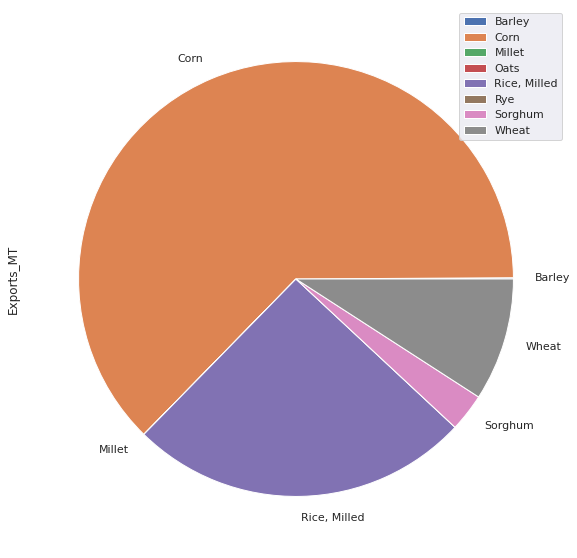

In [ ]:
check.plot(kind='pie', y= feature, figsize=(10,10), )

In [ ]:
def pie_country(Country, Feature):

  country_data = data[data['Country'] == Country]
 
  country_data.groupby(['Commodity_Description']).sum().plot(kind='pie', y= Feature, figsize=(10,10))